# Arbol de clasificacion de decisiones

## Importamos las librerias

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 		#Usar para comprobar resultados
from sklearn.metrics import classification_report 	#Usar para comprobar resultados

## Cargamos los datos en el notebook

In [80]:
direction_train = "../Train_knight.csv"
direction_xtest = "../Test_knight.csv"
x = pd.read_csv(direction_train)
x["knight"] = x["knight"].map({"Jedi": 1, "Sith": 0})
y = x["knight"]
x = x.drop("knight", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

## Reutilizamos el codigo del calculo de las matrices de confusion

In [81]:
def calculate_matrix(y, y_predict):
    matrix = [[0, 0], [0, 0]]  # [[TP, FP], [FN, TN]]
    
    for index in range(len(y)):
        true_val = y.iloc[index]
        pred_val = y_predict[index]

        if true_val == 1 and pred_val == 1:  # True Positive
            matrix[0][0] += 1
        elif true_val == 0 and pred_val == 1:  # False Positive
            matrix[0][1] += 1
        elif true_val == 1 and pred_val == 0:  # False Negative
            matrix[1][0] += 1
        elif true_val == 0 and pred_val == 0:  # True Negative
            matrix[1][1] += 1

    return matrix

def calculate_metrics(matrix):
    #Base metrics
    TP = matrix[0][0]
    FN = matrix[0][1]
    FP = matrix[1][0]
    TN = matrix[1][1]

    #Metrics for jedi
    precision_j = TP / (TP + FP) #precision para determinar un jedi
    recall_j = TP / (TP + FN) #sensibilidad para determinar un jedi
    f1_score_j = (2 * (precision_j * recall_j)) / (precision_j + recall_j)
    total_j = TP + FN #Total of jedis

    #Shit (i didnt meant sith) Metrics
    precision_s = TN / (TN + FN) #precision para determinar un sith
    recall_s = TN / (TN + FP) #sensibilidad para determinar un sith
    f1_score_s = (2 * (precision_s * recall_s)) / (precision_s + recall_s)
    total_s = TN + FP #Total of shits

	#accuracy over total predictions
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    total = TP + TN + FP + FN

    print(f"{'':<10}{'precision':>10}{'recall':>10}{'f1-score':>12}{'total':>8}")
    print(f"{'Jedi : 1':<10}{precision_j:>10.2f}{recall_j:>10.2f}{f1_score_j:>12.2f}{total_j:>8}")
    print(f"{'Sith : 0':<10}{precision_s:>10.2f}{recall_s:>10.2f}{f1_score_s:>12.2f}{total_s:>8}")
    print(f"{'accuracy':<30}{accuracy:>12.2f}{total:>8}")
    return
#       Confusion Table
#           Predicción
#           1     0
#Real  1 | TP | FN |
#      0 | FP | TN |
def plot_confusion_matrix(matrix):
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Jedi : 1', 'Sith : 0']); ax.yaxis.set_ticklabels(['Jedi : 1', 'Sith : 0'])
    plt.show()

## Creamos los objetos 

In [82]:
clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)

yhat = clf.predict(x_test)
#print("Accuracy:",metrics.accuracy_score(y_test, yhat))


## Realizamos una matriz de confusion para averiguar las estadisticas del modelo

[[31, 2], [2, 45]]
           precision    recall    f1-score   total
Jedi : 1        0.94      0.94        0.94      33
Sith : 0        0.96      0.96        0.96      47
accuracy                              0.95      80


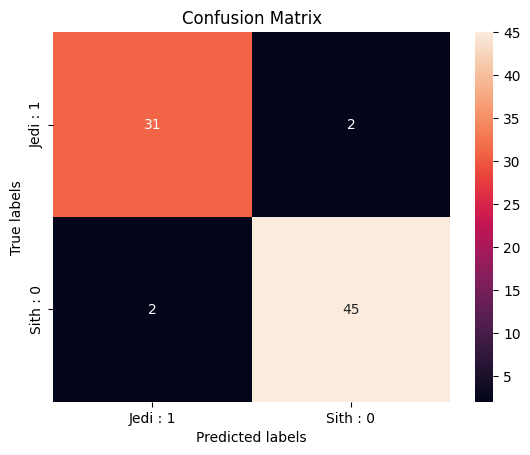

In [83]:
conf_matrix = calculate_matrix(y_test, yhat)

print (conf_matrix)
calculate_metrics(conf_matrix)
plot_confusion_matrix(conf_matrix)

## Realizamos la matriz con el modelo de sklearn

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.94      0.94      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



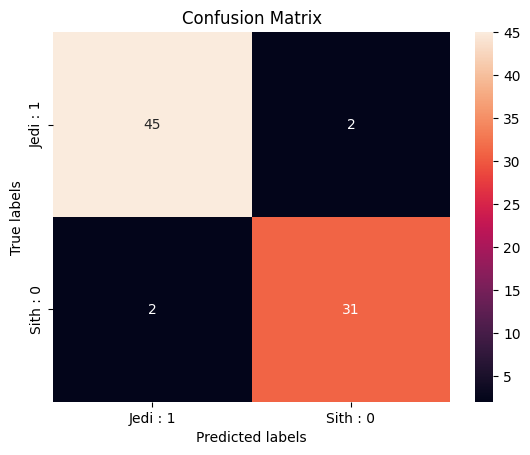

In [84]:
comp = confusion_matrix(y_test,yhat)
print(classification_report(y_test, yhat))
plot_confusion_matrix(comp)

## Visualizamos el arbol de toma de decisiones

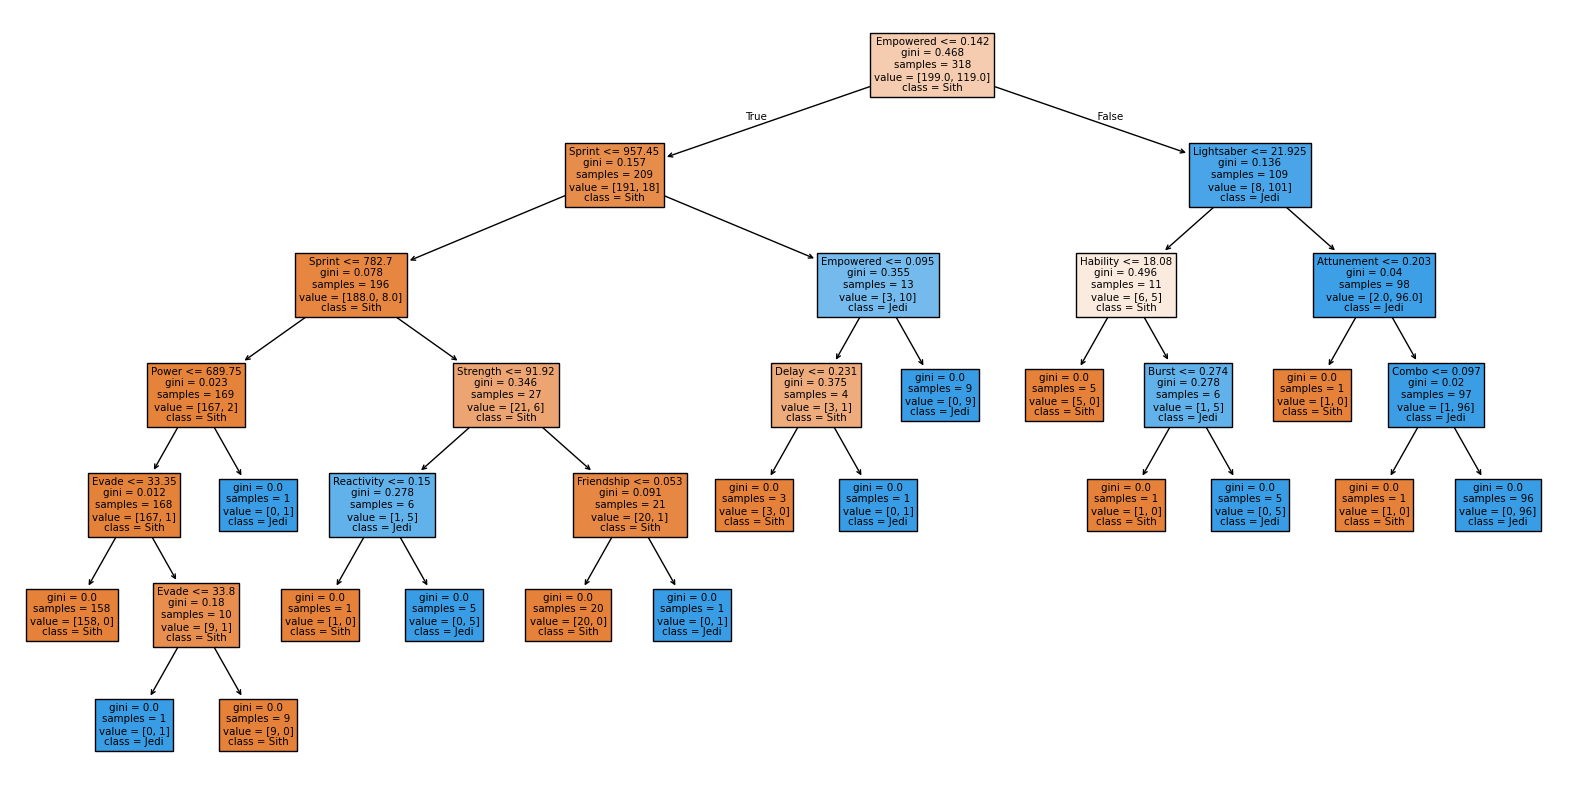

In [85]:
plt.figure(figsize=(20,10))  # Ajusta el tamaño según tu árbol
plot_tree(clf, filled=True, feature_names=x.columns, class_names=["Sith", "Jedi"])
plt.show()